<a href="https://colab.research.google.com/github/YuenWaHo/data-repo/blob/main/Lin_road_runoff_pollutant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/YuenWaHo/data-repo/refs/heads/main/LIN-Yinghong-road-runoff-pollutants.csv')
annotations = df.columns

df.columns = ['pkey', 'Rainfall_events', 'Sites', 'Temperature', 'EC', 'Turbidity', 'TSS', 'pH', 'DO',
              'Salinity', 'BOD5', 'COD', 'E_coli', 'NH4-N', 'NO3--N', 'NO2--N', 'TIN', 'PO4', 'Fluoride',
              'Chloride', 'Sulphate', 'Bromide', 'Total_alkalinity', 'Hardness',
              'Al', 'As', 'Cr', 'Cd', 'Pb', 'Zn', 'Cu', 'Fe', 'Mn', 'Ni', 'MP']

def map_season(event):
    if event in [1, 9]:
        return "Winter"
    elif event == 2:
        return "Spring"
    elif event in [3, 4, 5, 6, 10]:
        return "Summer"
    elif event in [7, 8, 11]:
        return "Autumn"
    else:
        return "Unknown"

# Apply the mapping
df['Season'] = df['Rainfall_events'].apply(map_season)

In [3]:
df.head(5)

,pkey,Rainfall_events,Sites,Temperature,EC,Turbidity,TSS,pH,DO,Salinity,...,Cr,Cd,Pb,Zn,Cu,Fe,Mn,Ni,MP,Season
0,1,1,A,15.2,1.060,167.5,163.1,6.71,8.01,0.655868,...,0.017621,0.000079,0.016443,0.501714,0.116357,2.286950,0.083736,0.006736,40.0,Winter
1,2,1,B,17.9,1.070,116.5,115.8,7.03,7.74,0.620312,...,0.020764,0.000700,0.016407,0.672764,0.230229,1.902014,0.135929,0.016229,30.0,Winter
2,3,1,C,17.3,2.370,141.0,146.6,6.99,6.18,1.448951,...,0.020479,0.000243,0.017150,0.410464,0.148364,2.199050,0.056293,0.016393,60.0,Winter
3,4,1,D,17.8,1.590,146.0,129.2,6.86,3.97,0.940778,...,0.021407,0.000279,0.013286,0.675550,0.222429,2.023100,0.173021,0.023107,50.0,Winter
4,5,1,E,20.1,0.167,106.5,438.4,7.11,6.99,0.089774,...,0.022421,0.000336,0.014200,0.707064,0.238564,2.164464,0.181571,0.023586,60.0,Winter


In [4]:
df.describe()

,pkey,Rainfall_events,Temperature,EC,Turbidity,TSS,pH,DO,Salinity,BOD5,...,As,Cr,Cd,Pb,Zn,Cu,Fe,Mn,Ni,MP
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,34.000000,5.328358,21.467164,0.693280,75.330052,134.069751,6.699851,5.364366,0.586929,14.976765,...,0.000994,0.012497,0.000102,0.009534,0.191650,0.058268,0.767379,0.033426,0.005467,227.186567
std,19.485037,2.846519,2.881495,1.239762,71.855447,105.611149,0.519121,1.519051,2.681611,8.192314,...,0.000785,0.005003,0.000189,0.008516,0.203547,0.069810,0.802068,0.035873,0.008847,218.688478
min,1.000000,1.000000,15.200000,0.005000,0.273000,0.000000,4.430000,2.020000,0.010808,0.294800,...,0.000005,0.000115,0.000000,0.000000,0.000000,0.000621,0.000000,0.000663,0.000262,0.000000
25%,17.500000,3.000000,19.900000,0.129500,16.550000,55.950000,6.455000,4.530000,0.066383,7.883889,...,0.000398,0.009093,0.000000,0.002190,0.062729,0.019550,0.107627,0.009956,0.001655,55.000000
50%,34.000000,5.000000,21.200000,0.262000,57.900000,131.240000,6.700000,5.440000,0.120560,18.680000,...,0.000850,0.013429,0.000028,0.007929,0.123443,0.035978,0.612343,0.023343,0.003077,160.000000
75%,50.500000,8.000000,22.650000,0.575000,105.250000,173.150000,7.040000,6.245000,0.200323,21.433050,...,0.001345,0.015889,0.000134,0.014329,0.232468,0.065764,1.094914,0.039218,0.005193,315.000000
max,67.000000,11.000000,30.200000,6.390000,276.000000,438.400000,7.610000,10.210000,21.800000,24.450000,...,0.003086,0.022421,0.001200,0.037736,0.707064,0.376286,3.981343,0.181571,0.065057,940.000000


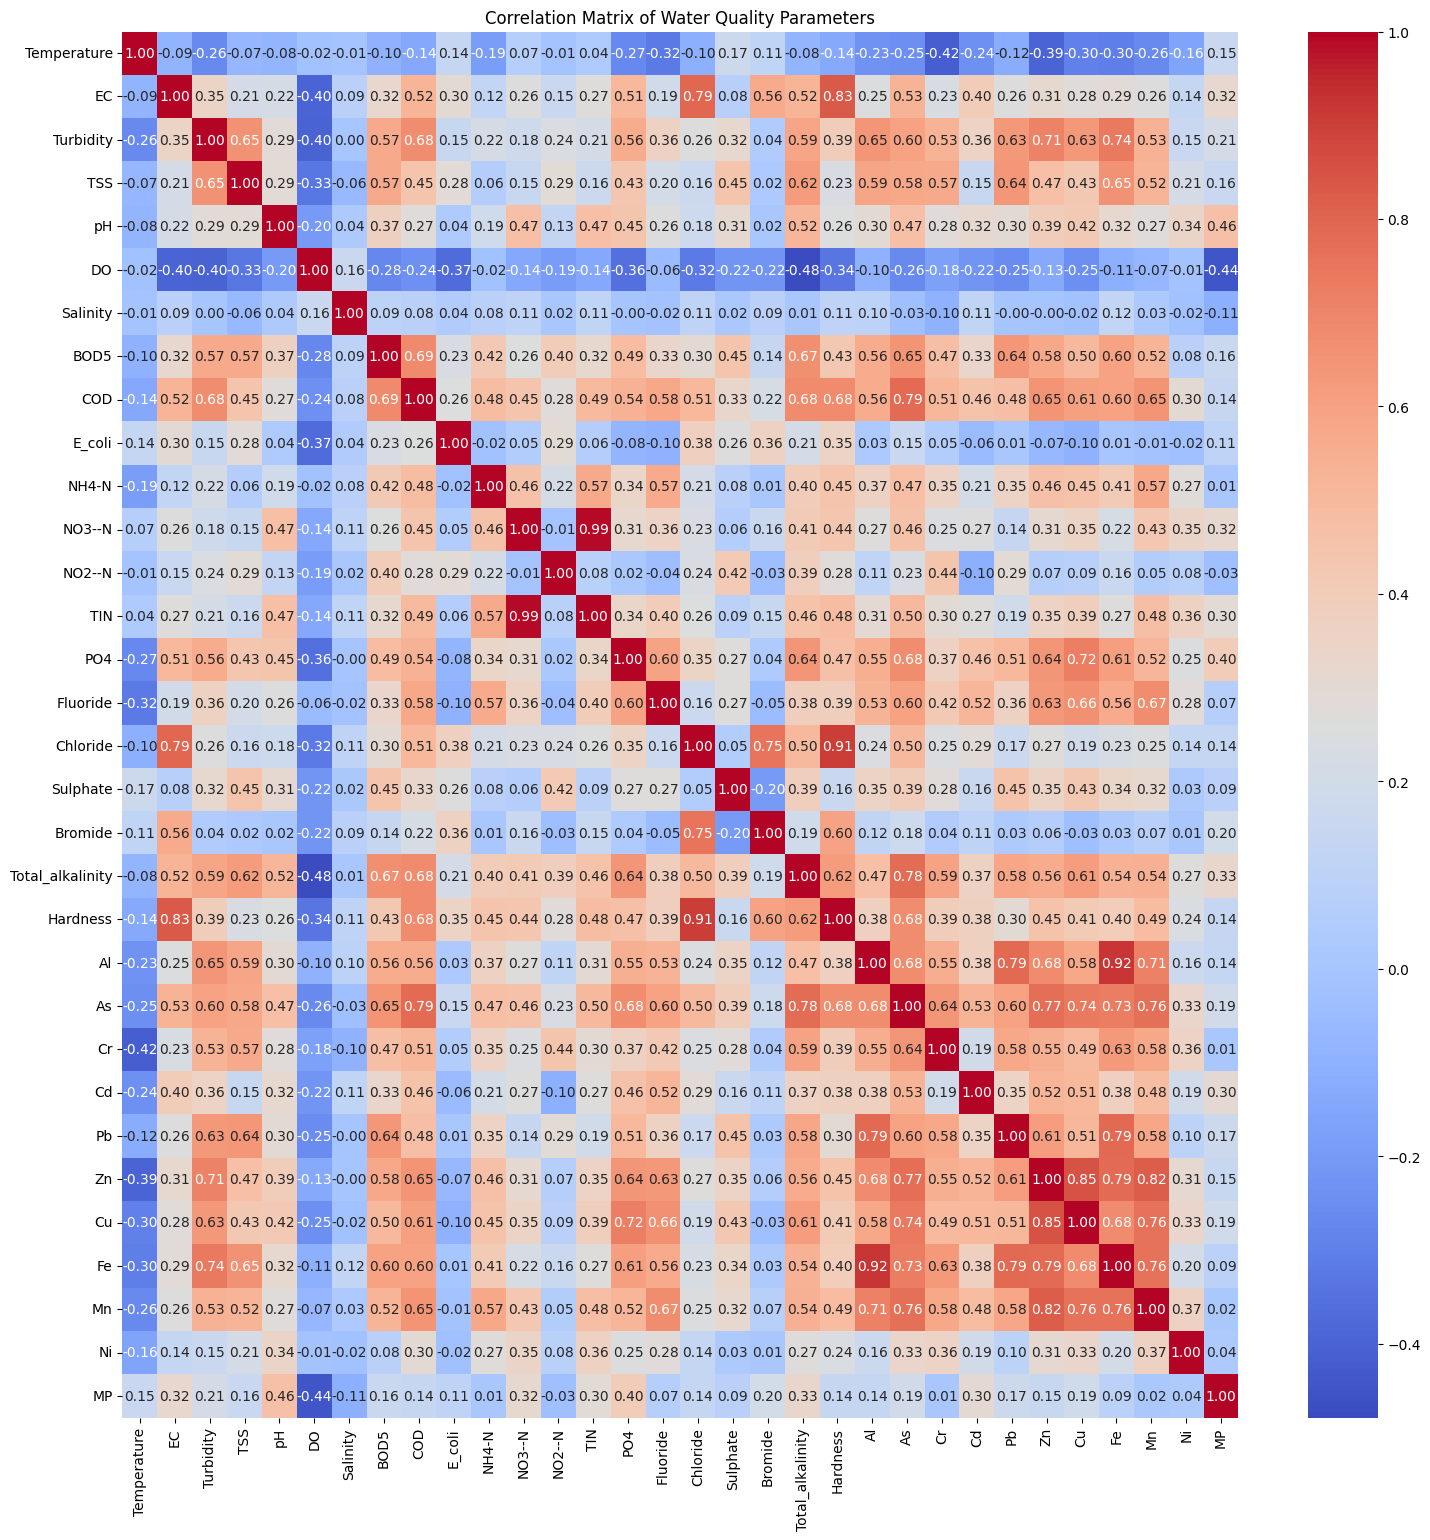

In [5]:
correlation_matrix = df.iloc[:,3:-1].corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Water Quality Parameters")
plt.show()


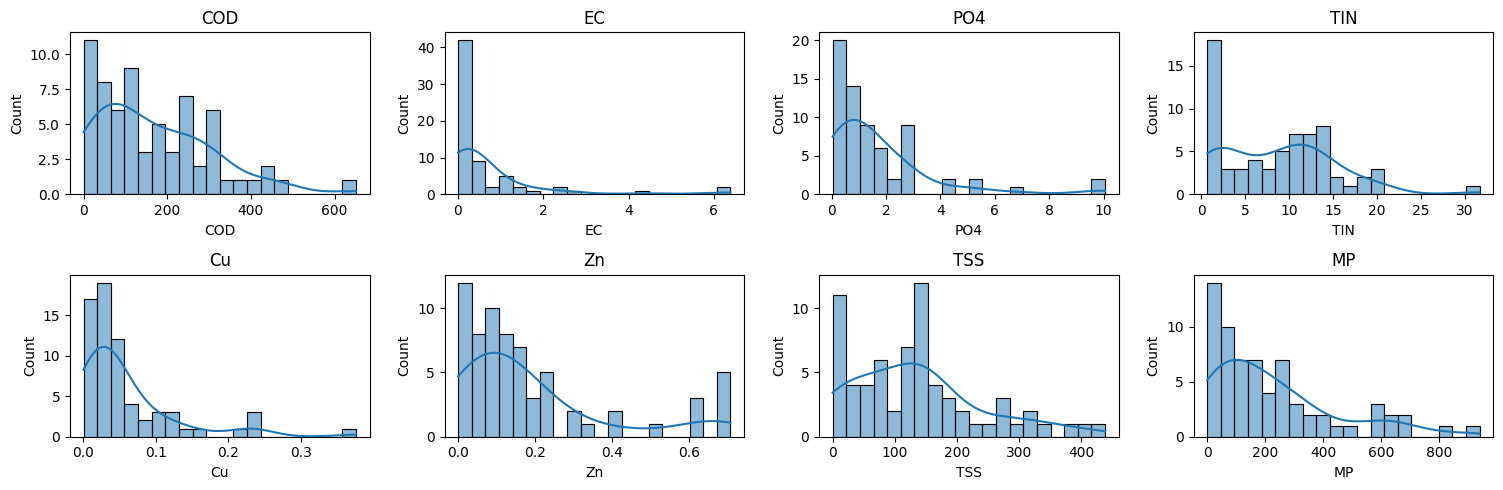

In [6]:
parameters = ['COD', 'EC', 'PO4', 'TIN', 'Cu', 'Zn', 'TSS', 'MP']

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
axes = axes.flatten()
for i, param in enumerate(parameters):
  ax = axes[i]
  sns.histplot(df[param], kde=True, ax=ax, bins=20)
  ax.set_title(f'{param}')

plt.tight_layout()
plt.show()


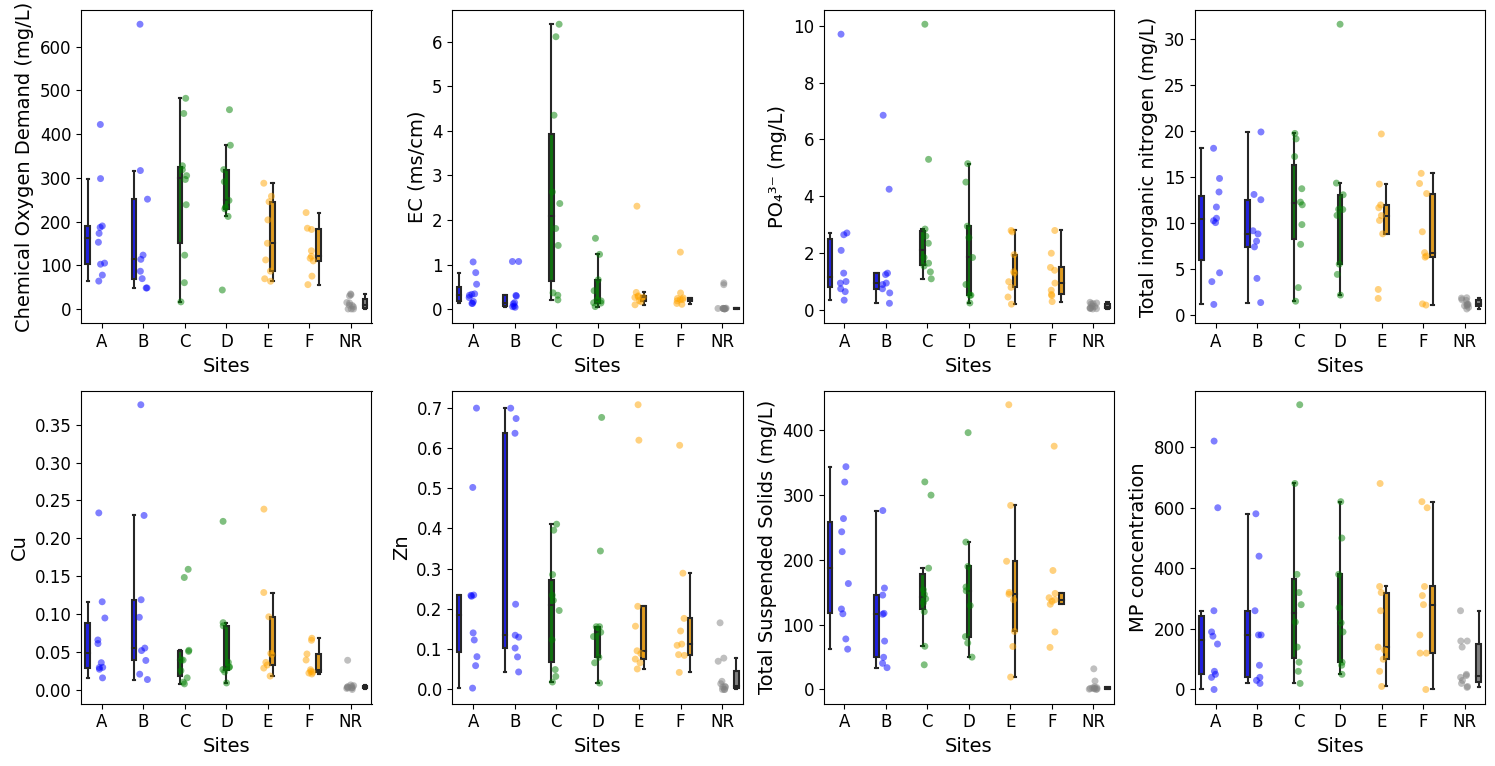

In [18]:
palette = {
    'A': 'blue', 'B': 'blue',
    'C': 'green', 'D': 'green',
    'E': 'orange', 'F': 'orange',
    'NR': 'grey'
}

ylab_annotation = ['Chemical Oxygen Demand (mg/L)', 'EC (ms/cm)', 'PO₄³⁻ (mg/L)', 'Total inorganic nitrogen (mg/L)',
                   'Cu', 'Zn', 'Total Suspended Solids (mg/L)', 'MP concentration']
parameters = ['COD', 'EC', 'PO4', 'TIN', 'Cu', 'Zn', 'TSS', 'MP']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()
for i, param in enumerate(parameters):
    ax = axes[i]
    sns.boxplot(data=df, x='Sites', y=param, ax=ax, hue='Sites', palette=palette, showfliers=False)
    sns.stripplot(data=df, x='Sites', y=param, ax=ax, hue='Sites', palette=palette, edgecolor='black', alpha=0.5)
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    ax.set_xlabel("Sites", fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel(ylab_annotation[i], fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


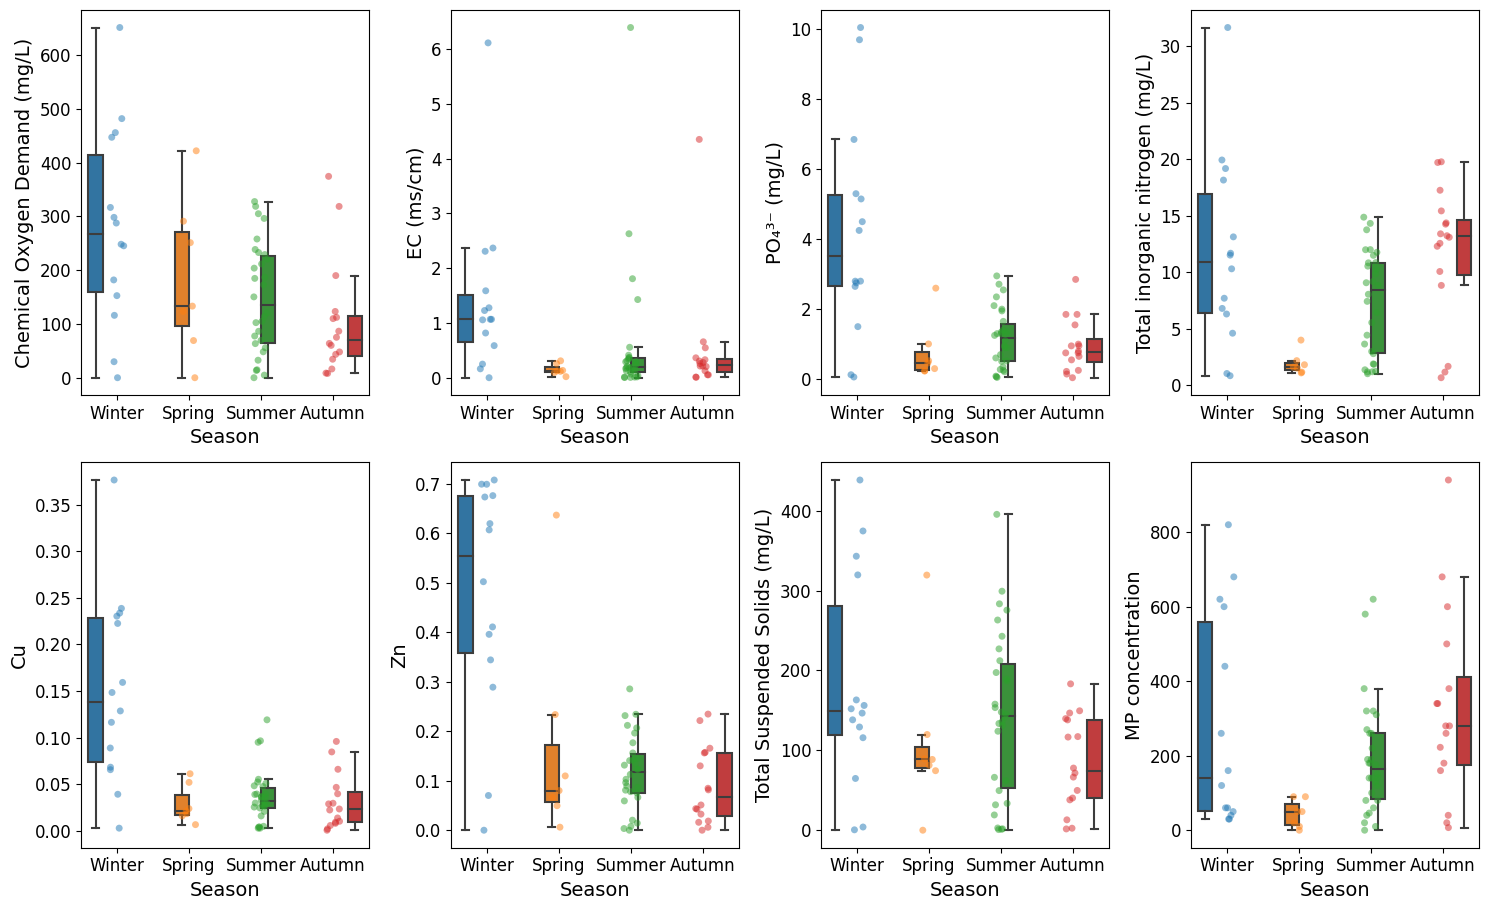

In [ ]:
ylab_annotation = ['Chemical Oxygen Demand (mg/L)', 'EC (ms/cm)', 'PO₄³⁻ (mg/L)', 'Total inorganic nitrogen (mg/L)',
                   'Cu', 'Zn', 'Total Suspended Solids (mg/L)', 'MP concentration']
parameters = ['COD', 'EC', 'PO4', 'TIN', 'Cu', 'Zn', 'TSS', 'MP']

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
for i, param in enumerate(parameters):
    ax = axes[i]
    sns.boxplot(data=df, x='Season', y=param, ax=ax, hue='Season', showfliers=False)
    sns.stripplot(data=df, x='Season', y=param, ax=ax, hue='Season', alpha=0.5, edgecolor='black')
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    ax.set_xlabel("Season", fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel(ylab_annotation[i], fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Statistical Analysis

In [9]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install scikit-posthocs
import scikit_posthocs as sp


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


Interpretation:

- p-value > 0.05: Variances are equal across groups.
- p-value ≤ 0.05: Variances are not equal.


In [ ]:
model = ols('COD ~ C(Season)', data=df).fit()
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistics={shapiro_stat}, p-value={shapiro_p}")

Shapiro-Wilk Test: Statistics=0.9762272306802428, p-value=0.2270017448845706


Levene's test:
Interpretation:

- p-value > 0.05: Variances are equal across groups.
- p-value ≤ 0.05: Variances are not equal.

In [ ]:
levene_stat, levene_p = stats.levene(*groups)
print(f"Levene’s Test: Statistics={levene_stat}, p-value={levene_p}")

Levene’s Test: Statistics=2.214627671669515, p-value=0.09510913859148205


In [ ]:
# Example for COD across Season
groups = [group['COD'].values for name, group in df.groupby('Season')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA result for COD across Season: F={f_stat}, p={p_val}")

ANOVA result for COD across Season: F=5.154939804540816, p=0.002992850586591127


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
Autumn Spring  79.6737 0.5179  -72.9428 232.2902  False
Autumn Summer  43.5841 0.6889  -60.6728  147.841  False
Autumn Winter 174.8793 0.0022   51.6303 298.1283   True
Spring Summer -36.0896 0.9066 -177.4533 105.2741  False
Spring Winter  95.2056 0.3796  -60.6934 251.1046  False
Summer Winter 131.2952  0.012   22.2897 240.3007   True
-------------------------------------------------------


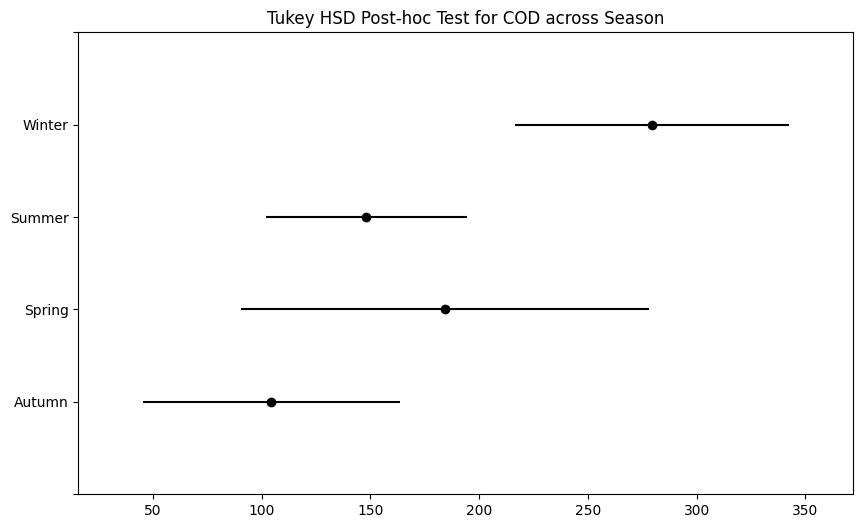

In [ ]:
tukey = pairwise_tukeyhsd(endog=df['COD'], groups=df['Season'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.title('Tukey HSD Post-hoc Test for COD across Season')
plt.show()


In [ ]:
# If non-normal
# Kruskal-Wallis H-test
kruskal_stat, kruskal_p = stats.kruskal(*groups)
print(f"Kruskal-Wallis Test: Statistics={kruskal_stat}, p-value={kruskal_p}")


Kruskal-Wallis Test: Statistics=9.420644043057807, p-value=0.024190733778670977


ANOVA result for COD across Sites: F=5.5315, p=0.0001


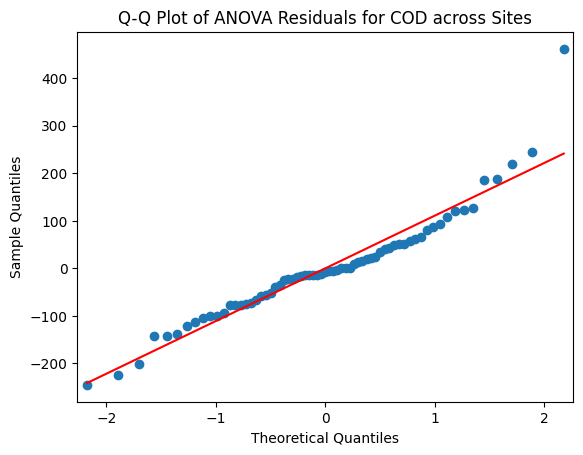

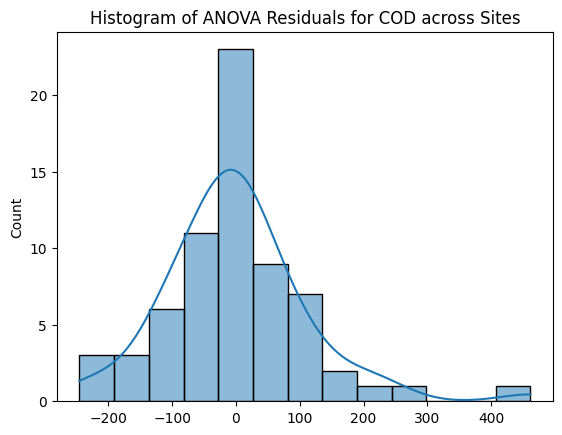

Shapiro-Wilk Test: Statistics=0.9339, p-value=0.0015
Levene’s Test: Statistics=2.0212, p-value=0.0767


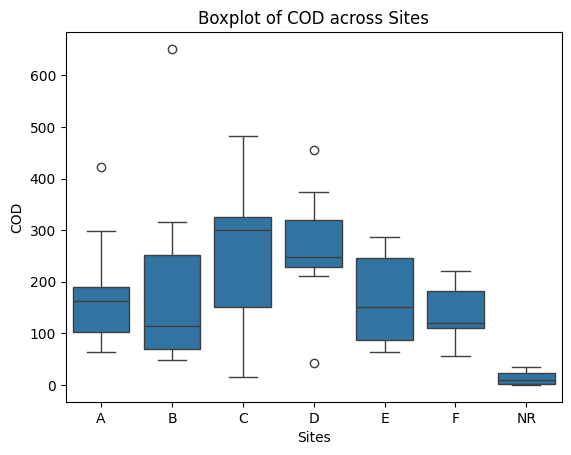

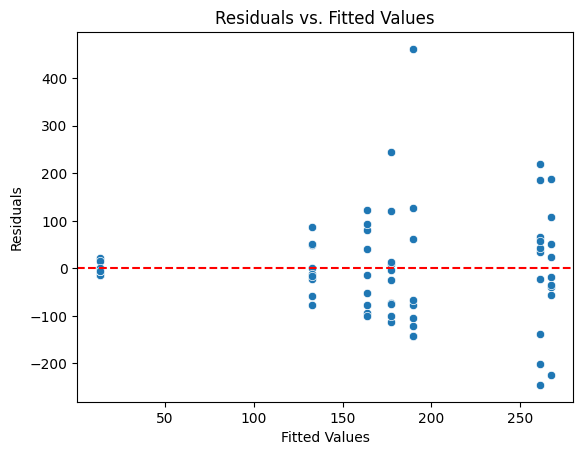

ANOVA assumptions are violated. Considering alternatives.
Residuals are not normally distributed. Considering data transformation or non-parametric tests.
Shapiro-Wilk Test (Transformed): Statistics=0.9518, p-value=0.0112
Transformed data still violates normality. Using Kruskal-Wallis Test.
Kruskal-Wallis Test: Statistics=32.4825, p-value=0.0000
Dunn’s Test Post-hoc Results:
           A         B         C         D         E        F        NR
A   1.000000  1.000000  1.000000  1.000000  1.000000  1.00000  0.005887
B   1.000000  1.000000  1.000000  1.000000  1.000000  1.00000  0.022777
C   1.000000  1.000000  1.000000  1.000000  1.000000  1.00000  0.000038
D   1.000000  1.000000  1.000000  1.000000  1.000000  1.00000  0.000022
E   1.000000  1.000000  1.000000  1.000000  1.000000  1.00000  0.013784
F   1.000000  1.000000  1.000000  1.000000  1.000000  1.00000  0.069430
NR  0.005887  0.022777  0.000038  0.000022  0.013784  0.06943  1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import scikit_posthocs as sp
import statsmodels.stats.api as sms

# Assume 'df' is your DataFrame and 'Sites' is the grouping variable

# 1. Initial ANOVA
groups = [group['COD'].values for name, group in df.groupby('Sites')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA result for COD across Sites: F={f_stat:.4f}, p={p_val:.4f}")

# 2. Check Assumptions

## a. Normality of Residuals
model = ols('COD ~ C(Sites)', data=df).fit()
residuals = model.resid

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of ANOVA Residuals for COD across Sites')
plt.show()

# Histogram
sns.histplot(residuals, kde=True)
plt.title('Histogram of ANOVA Residuals for COD across Sites')
plt.show()

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistics={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

## b. Homogeneity of Variances
levene_stat, levene_p = stats.levene(*groups)
print(f"Levene’s Test: Statistics={levene_stat:.4f}, p-value={levene_p:.4f}")

# Boxplot for Homogeneity
sns.boxplot(x='Sites', y='COD', data=df)
plt.title('Boxplot of COD across Sites')
plt.show()

# Residuals vs. Fitted
fitted = model.fittedvalues
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# 3. Interpret Assumptions

## If Normality is Met and Homogeneity is Met:
if shapiro_p > 0.05 and levene_p > 0.05:
    print("ANOVA assumptions are met. Proceeding with ANOVA.")
    # Post-hoc
    tukey = pairwise_tukeyhsd(endog=df['COD'], groups=df['Sites'], alpha=0.05)
    print(tukey)
    tukey.plot_simultaneous()
    plt.title('Tukey HSD Post-hoc Test for COD across Sites')
    plt.show()
else:
    print("ANOVA assumptions are violated. Considering alternatives.")

    ## If Normality is Violated:
    if shapiro_p <= 0.05:
        print("Residuals are not normally distributed. Considering data transformation or non-parametric tests.")
        # Example: Log Transformation
        df['COD_log'] = np.log(df['COD'] + 1)  # Adding 1 to avoid log(0)
        model_log = ols('COD_log ~ C(Sites)', data=df).fit()
        residuals_log = model_log.resid

        # Shapiro-Wilk Test on Transformed Data
        shapiro_stat_log, shapiro_p_log = stats.shapiro(residuals_log)
        print(f"Shapiro-Wilk Test (Transformed): Statistics={shapiro_stat_log:.4f}, p-value={shapiro_p_log:.4f}")

        if shapiro_p_log > 0.05:
            print("Transformed data meets normality. Re-running ANOVA on transformed data.")
            # Re-run ANOVA on transformed data
            model_log = ols('COD_log ~ C(Sites)', data=df).fit()
            anova_table_log = sm.stats.anova_lm(model_log, typ=2)
            print(anova_table_log)

            # Post-hoc
            tukey_log = pairwise_tukeyhsd(endog=df['COD_log'], groups=df['Sites'], alpha=0.05)
            print(tukey_log)
            tukey_log.plot_simultaneous()
            plt.title('Tukey HSD Post-hoc Test for Transformed COD across Sites')
            plt.show()
        else:
            print("Transformed data still violates normality. Using Kruskal-Wallis Test.")
            # Kruskal-Wallis Test
            kruskal_stat, kruskal_p = stats.kruskal(*groups)
            print(f"Kruskal-Wallis Test: Statistics={kruskal_stat:.4f}, p-value={kruskal_p:.4f}")

            # Post-hoc: Dunn’s Test
            dunn = sp.posthoc_dunn(df, val_col='COD', group_col='Sites', p_adjust='bonferroni')
            print("Dunn’s Test Post-hoc Results:")
            print(dunn)

    ## If Homogeneity of Variances is Violated:
    if levene_p <= 0.05:
        print("Variances are not equal across groups. Considering Welch’s ANOVA or non-parametric tests.")
        # Welch’s ANOVA using statsmodels
        welch_anova = sms.anova_lm(model, typ=2, robust='hc3')
        print("Welch’s ANOVA Results:")
        print(welch_anova)

        # Alternatively, use Kruskal-Wallis
        kruskal_stat, kruskal_p = stats.kruskal(*groups)
        print(f"Kruskal-Wallis Test: Statistics={kruskal_stat:.4f}, p-value={kruskal_p:.4f}")

        # Post-hoc: Dunn’s Test
        dunn = sp.posthoc_dunn(df, val_col='COD', group_col='Sites', p_adjust='bonferroni')
        print("Dunn’s Test Post-hoc Results:")
        print(dunn)


## PCA

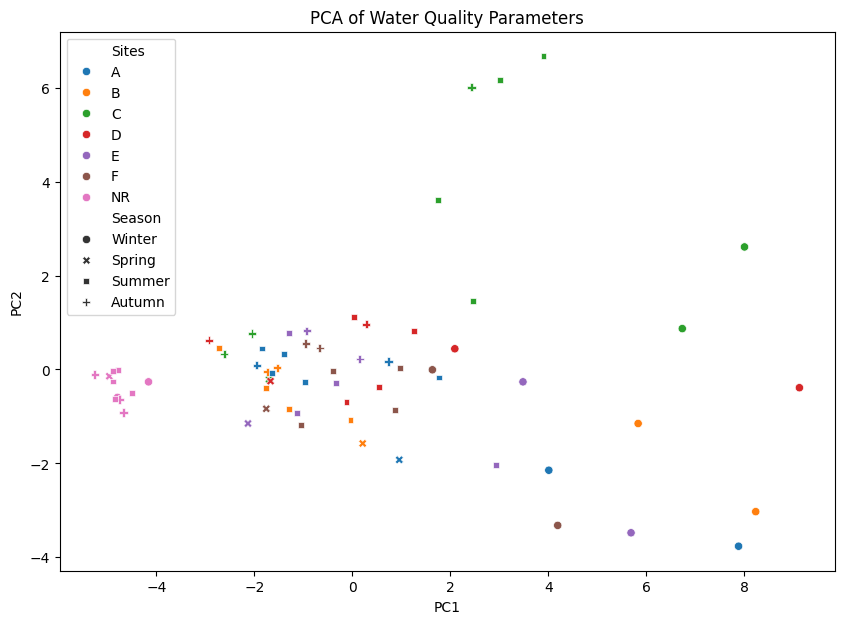

Explained variance by PC1 and PC2: [0.38197243 0.1031047 ]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 3:-1].select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca = pd.concat([df_pca, df['Sites'], df['Season']], axis=1)

# Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sites', style='Season')
plt.title('PCA of Water Quality Parameters')
plt.show()

print(f"Explained variance by PC1 and PC2: {pca.explained_variance_ratio_}")


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


X = df.iloc[:,3:-1].select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add 'Sites' and 'Season' to df_pca for plotting purposes
df_pca = pd.concat([df_pca, df[['Sites', 'Season']].reset_index(drop=True)], axis=1)

# Display explained variance
print(f"Explained variance by PC1 and PC2: {pca.explained_variance_ratio_}")


Explained variance by PC1 and PC2: [0.38197243 0.1031047 ]


In [ ]:
from sklearn.cluster import KMeans
# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit KMeans and predict cluster labels
clusters = kmeans.fit_predict(X_scaled)
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters
# Alternatively, add cluster labels to df_pca
df_pca['Cluster'] = clusters


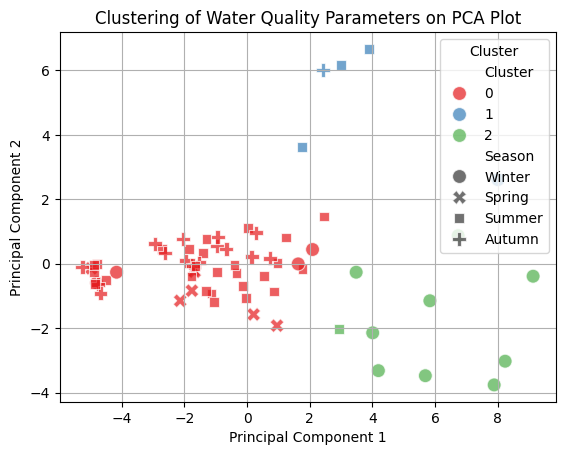

In [ ]:
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_pca = pca.transform(cluster_centers_scaled)
df_centers = pd.DataFrame(cluster_centers_pca, columns=['PC1', 'PC2'])
df_centers['Cluster'] = range(kmeans.n_clusters)

sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set1',
    style='Season',
    s=100,
    alpha=0.7
)

plt.title('Clustering of Water Quality Parameters on PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## UMAP

In [ ]:
pip install umap-learn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
numerical_cols = df.iloc[:, 3:-1].select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_cols]

X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_reducer.fit_transform(X_scaled)
df_umap = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
df_umap = pd.concat([df_umap, df[['Sites', 'Season', 'Rainfall_events']].reset_index(drop=True)], axis=1)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(umap_embeddings)
df_umap['Cluster'] = clusters

In [ ]:
df.iloc[0:5, 0:10]

,pkey,Rainfall_events,Sites,Temperature,EC,Turbidity,TSS,pH,DO,Salinity
0,1,1,A,15.2,1.060,167.5,163.1,6.71,8.01,0.655868
1,2,1,B,17.9,1.070,116.5,115.8,7.03,7.74,0.620312
2,3,1,C,17.3,2.370,141.0,146.6,6.99,6.18,1.448951
3,4,1,D,17.8,1.590,146.0,129.2,6.86,3.97,0.940778
4,5,1,E,20.1,0.167,106.5,438.4,7.11,6.99,0.089774


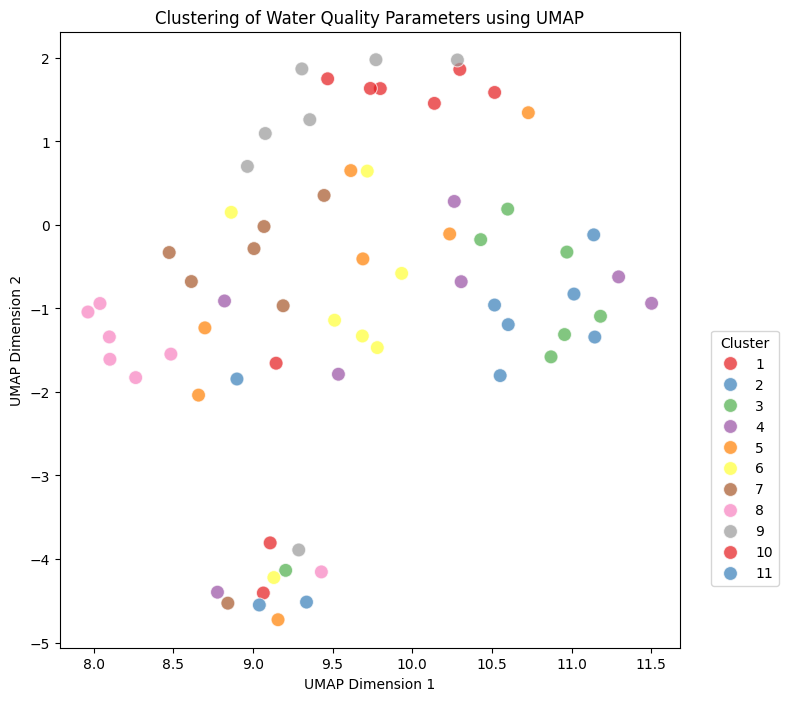

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df_umap,
    x='UMAP1',
    y='UMAP2',
    hue='Rainfall_events',
    palette='Set1',
    # style='Season',
    s=100,
    alpha=0.7
)
plt.title('Clustering of Water Quality Parameters using UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', loc=(1.05, 0.1))
# plt.grid(True)
plt.show()


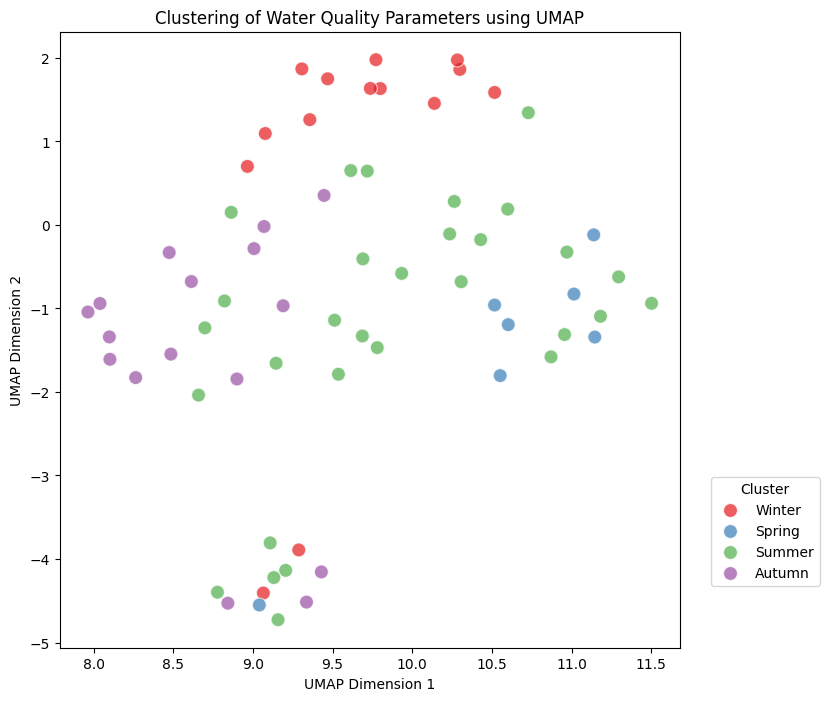

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df_umap,
    x='UMAP1',
    y='UMAP2',
    hue='Season',
    palette='Set1',
    # style='Season',
    s=100,
    alpha=0.7
)
plt.title('Clustering of Water Quality Parameters using UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', loc=(1.05, 0.1))
# plt.grid(True)
plt.show()


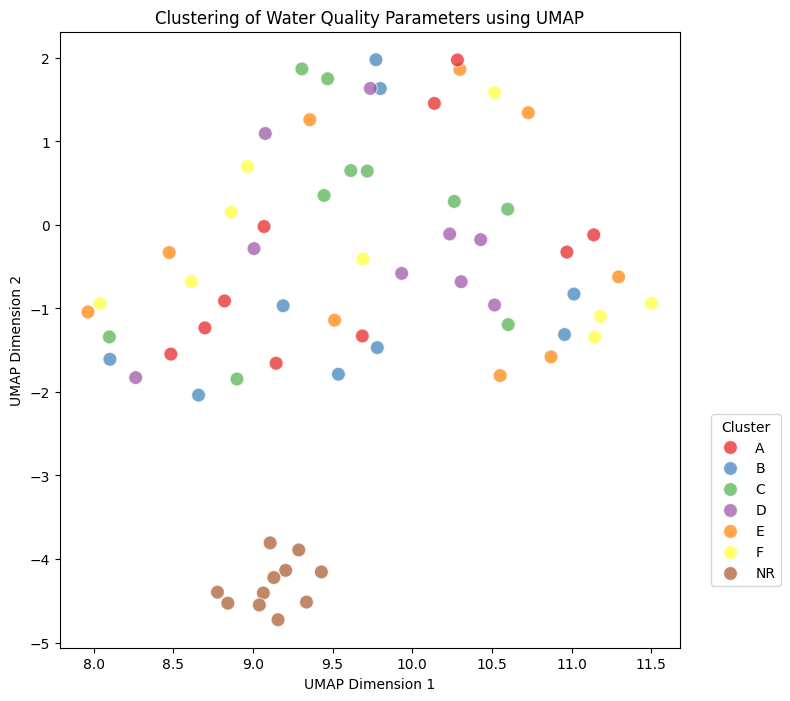

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df_umap,
    x='UMAP1',
    y='UMAP2',
    hue='Sites',
    palette='Set1',
    # style='Season',
    s=100,
    alpha=0.7
)
plt.title('Clustering of Water Quality Parameters using UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', loc=(1.05, 0.1))
# plt.grid(True)
plt.show()
